##**Assignment 2 =  H20 AUTOML**

1. Name: Sanika Patne
2. NUID: 001099125

##**Abstract**

The goal was to construct a realistic model to precisely predict the price of houses in Melbourne. It is generally believed that it’s impossible to precisely predict the price of house as it depends on various factors. For this dataset price is the dependent variable and others are independent variables. First, major factors affecting the housing prices should be selected. Then, a model for housing price prediction should be established from linear regression. That should be applied to the Melbourne housing dataset to test the model. Through the data analysis and test it can be summarized that the linear regression model can effectively predict and analyze the housing price to some extent, while the algorithm can still be improved through more advanced machine learning methods.

##**Dataset**

This is a  static snapshot of a dataset created by Tony Pino.

It was scraped from publicly available results posted every week from Domain.com.au. He cleaned it well, and now it's up to you to make data analysis magic. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.<br>
Notes on Specific Variables
Rooms: Number of rooms<br>
Price: Price in dollars<br>
Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.<br>
Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.<br>
SellerG: Real Estate Agent<br>
Date: Date sold<br>
Distance: Distance from CBD<br>
Regionname: General Region (West, North West, North, North east …etc)<br>
Propertycount: Number of properties that exist in the suburb.<br>
Bedroom2 : Scraped # of Bedrooms (from different source)<br>
Bathroom: Number of Bathrooms<br>
Car: Number of carspots<br>
Landsize: Land Size<br>
BuildingArea: Building Size<br>
CouncilArea: Governing council for the area

##**Importing required Libraries and H20 Initialization** 

In [1]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

In [2]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     |████████████████████████████████| 176.0 MB 4.9 kB/s 
  Created wheel for h2o: filename=h2o-3.36.0.2-py2.py3-none-any.whl size=176112127 sha256=10ba3c69f0e5417e77dcd763b973d5777fa08a20b43d47b25fe2172e2684d71f
  Stored in directory: /root/.cache/pip/wheels/0b/83/bd/343a6140119b4098103e725e1cfe9f198568d13cf103acbc7c
Successfully built h2o


In [3]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [4]:
min_mem_size=6 
run_time=222

In [5]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

6


In [6]:
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:35027 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.13" 2021-10-19; OpenJDK Runtime Environment (build 11.0.13+8-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.13+8-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmps7dykh06
  JVM stdout: /tmp/tmps7dykh06/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmps7dykh06/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:35027
Connecting to H2O server at http://127.0.0.1:35027 ... successful.


--------------------------  ----------------------------------------------------------------------------
H2O_cluster_uptime:         05 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.36.0.2
H2O_cluster_version_age:    19 days
H2O_cluster_name:           H2O_from_python_unknownUser_powp89
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    6 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:35027
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
H2O_API_Extensions:         Amazon S3, XGBoost, Algos, Infogram, AutoML, Core V3, TargetEncoder, Core V4
Python_version:             3.7.12 final
--------------------------  ----------------------------------------------------------------------------

In [7]:
# Import the processed data from notebook One
url = "https://github.com/Sanikap05/DataScience/raw/main/sample.csv"
df = h2o.import_file(path = url)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


##**Studying the Data**

In [8]:
df.describe()

Rows:6196
Cols:21




Suburb Address Rooms Type Price Method SellerG Date Distance Postcode Bedroom2 Bathroom Car Landsize BuildingArea YearBuilt CouncilArea Lattitude Longtitude Regionname Propertycount 
 
 
 type int int int int int int int int int int int int int int int int int int int int int 
 mins 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
 mean 141.7333763718528 3058.9891865719806 1.931407359586829 0.5832795351839898 717.5915106520335 1.4372175597159458 97.45432537120723 25.937378954163982 71.29841833440932 71.09522272433827 2.902033570045191 0.5763395739186573 1.5735958683021307 361.07730794060683 191.0622982569399 81.70125887669462 14.678502259522269 1756.043092317624 1867.631536475145 3.8244028405422843 188.2254680438993 
 maxs 286.0 6116.0 7.0 2.0 1569.0 4.0 202.0 50.0 191.0 184.0 9.0 7.0 10.0 1127.0 548.0 134.0 30.0 3462.0 3761.0 7.0 283.0 
 sigma 83.20219111646345 1766.4944044852118 0.9710788063154112 0.8539919799572625 402.38630106987245 1.1429382882321082 57.472556631767944 14.404004145977009 38.656203305486514 46.96929056768282 0.9700548212641686 0.7113618878731119 0.929946606819003 285.75760340659457 107.81590440091563 34.35460062890252 9.217255605003533 896.9752262444393 979.3745168200843 1.9865142710876427 71.49054360008813 
 zeros 36 1 329 4088 1 757 1 114 4 31 5 3284 431 1015 1 1 279 1 1 571 2 
 missing 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
 0 0.0 2790.0 1.0 0.0 839.0 1.0 18.0 41.0 12.0 50.0 2.0 0.0 0.0 110.0 85.0 23.0 29.0 1712.0 1839.0 2.0 135.0 
 1 0.0 4520.0 2.0 0.0 1118.0 3.0 18.0 42.0 12.0 50.0 3.0 1.0 0.0 88.0 224.0 23.0 29.0 1690.0 1854.0 2.0 135.0 
 2 0.0 4882.0 3.0 0.0 1174.0 4.0 112.0 43.0 12.0 50.0 3.0 0.0 2.0 74.0 212.0 130.0 29.0 1722.0 1851.0 2.0 135.0 
 3 0.0 1027.0 2.0 0.0 1291.0 1.0 112.0 46.0 12.0 50.0 4.0 1.0 0.0 198.0 313.0 32.0 29.0 1788.0 1932.0 2.0 135.0 
 4 0.0 6101.0 1.0 0.0 1193.0 1.0 112.0 50.0 12.0 50.0 2.0 0.0 2.0 209.0 143.0 17.0 29.0 1737.0 1869.0 2.0 135.0 
 5 0.0 535.0 1.0 0.0 878.0 1.0 18.0 50.0 12.0 50.0 3.0 0.0 2.0 174.0 78.0 23.0 29.0 1808.0 1926.0 2.0 135.0 
 6 0.0 4170.0 2.0 0.0 1050.0 4.0 112.0 7.0 12.0 50.0 3.0 1.0 2.0 168.0 287.0 121.0 29.0 1702.0 1885.0 2.0 135.0 
 7 0.0 1021.0 1.0 2.0 544.0 1.0 18.0 7.0 12.0 50.0 2.0 1.0 1.0 0.0 111.0 125.0 29.0 1713.0 1886.0 2.0 135.0 
 8 0.0 1533.0 1.0 0.0 1027.0 1.0 80.0 12.0 12.0 50.0 2.0 0.0 2.0 191.0 117.0 17.0 29.0 1695.0 1904.0 2.0 135.0 
 9 0.0 4244.0 2.0 0.0 948.0 1.0 80.0 14.0 12.0 50.0 3.0 1.0 1.0 67.0 149.0 10.0 29.0 1744.0 1832.0 2.0 135.0

In [9]:
df.types

{'Address': 'int',
 'Bathroom': 'int',
 'Bedroom2': 'int',
 'BuildingArea': 'int',
 'Car': 'int',
 'CouncilArea': 'int',
 'Date': 'int',
 'Distance': 'int',
 'Landsize': 'int',
 'Lattitude': 'int',
 'Longtitude': 'int',
 'Method': 'int',
 'Postcode': 'int',
 'Price': 'int',
 'Propertycount': 'int',
 'Regionname': 'int',
 'Rooms': 'int',
 'SellerG': 'int',
 'Suburb': 'int',
 'Type': 'int',
 'YearBuilt': 'int'}

In [10]:
df.shape

(6196, 21)

In [11]:
# Create a 80/20 train/test split
pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])

In [12]:
print(df_train.shape)
print(df_test.shape)

(4915, 21)
(1281, 21)


In [13]:
#Display all columns in X
X=df.columns
print(X)

['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount']


In [14]:
#Seperate Dependent variable from Independent variable
y_numeric ='Price'
X.remove(y_numeric) 
print(X)

['Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount']


In [15]:
dfpd=pd.read_csv("https://github.com/Sanikap05/DataScience/raw/main/sample.csv")

##**H20 AutoML Execution**

In [16]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [17]:
#pass the data through H20AutoML
aml.train(x=X,y=y_numeric,training_frame=df_train)  

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_3_AutoML_1_20220214_24748

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 4355.426126188325
RMSE: 65.99565232792479
MAE: 49.3963863842139
RMSLE: NaN
R^2: 0.9731944315650081
Mean Residual Deviance: 4355.426126188325
Null degrees of freedom: 4914
Residual degrees of freedom: 4900
Null deviance: 798599718.641709
Residual deviance: 21406919.410215616
AIC: 55163.82433454887

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 15739.633420452443
RMSE: 125.4576957402472
MAE: 92.72924649848521
RMSLE: NaN
R^2: 0.903130070727922
Mean Residual Deviance: 15739.633420452443
Null degrees of freedom: 4914
Residual degrees of freedom: 4899
Null deviance: 799090196.011239
Residual deviance: 77360298.26152375
A

In [18]:
print(aml.leaderboard)

model_id mean_residual_deviance rmse mse mae rmsle 
 
 
 StackedEnsemble_AllModels_3_AutoML_1_20220214_24748 15739.6 125.458 15739.6 92.7292 nan 
 StackedEnsemble_AllModels_2_AutoML_1_20220214_24748 16142.2 127.052 16142.2 93.6291 nan 
 StackedEnsemble_AllModels_1_AutoML_1_20220214_24748 16281.9 127.601 16281.9 93.7928 nan 
 StackedEnsemble_BestOfFamily_3_AutoML_1_20220214_24748 16555.6 128.669 16555.6 95.0059 nan 
 StackedEnsemble_BestOfFamily_2_AutoML_1_20220214_24748 16558.1 128.678 16558.1 94.9627 nan 
 GBM_2_AutoML_1_20220214_24748 16955.4 130.213 16955.4 96.7212 nan 
 StackedEnsemble_BestOfFamily_1_AutoML_1_20220214_24748 17099.7 130.766 17099.7 96.439 nan 
 GBM_5_AutoML_1_20220214_24748 17117.2 130.833 17117.2 97.5992 nan 
 GBM_grid_1_AutoML_1_20220214_24748_model_4 17125.4 130.864 17125.4 97.7997 nan 
 GBM_3_AutoML_1_20220214_24748 17203.7 131.163 17203.7 97.2929 nan

##**Analysing relation between all variables**

When all independent variables were plotted against 'price' variable it is observed that for'Landsize' and 'BuildingArea' roughly a linear line is obtained. So it can be concluded from this plot that variables Landsize and BuildingArea have linear relation with Price.

VIF stands for Variance Inflation Factor.It signifies multicollinearity among set of different independent variable. A value greater than 10 means that the independent variable is highly correlated with some other variable. Will calculate VIF value for all variables to check the dependency and then will drop the variables with high VIF value.

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Indicate which variables to compute VIF
Multic = dfpd[['YearBuilt', 'Distance', 'Rooms', 'Longtitude', 'Bathroom','Suburb','Address','Type','SellerG','Method','Date','Postcode','Bedroom2','Car','Landsize','BuildingArea','CouncilArea','Lattitude','Regionname','Propertycount']]
#Compute VIF
vif = pd.DataFrame()
vif["variables"] = Multic.columns
vif["VIF"] = [variance_inflation_factor(Multic.values, i) for i in range(Multic.shape[1])]
vif

variables        VIF
0       YearBuilt  10.475637
1        Distance   7.637472
2           Rooms  55.307917
3      Longtitude  11.004935
4        Bathroom   3.461328
5          Suburb   3.961901
6         Address   3.949918
7            Type   3.120556
8         SellerG   3.796406
9          Method   2.582672
10           Date   4.103909
11       Postcode   8.235019
12       Bedroom2  95.888657
13            Car   5.307108
14       Landsize   3.952572
15   BuildingArea  13.121787
16    CouncilArea   3.824382
17      Lattitude   8.020548
18     Regionname   6.569622
19  Propertycount   8.054029

VIF for 'YearBuilt','Rooms','Longtitude','Bedroom2' and 'BuildingArea' is greater than 10.'Rooms','Bedroom2' and 'BuildingArea' specify the same thing. More the rooms more will be the building area. Will drop the variables Bedroom2, Longtitude and YearBuilt. Not dropping Rooms as for a customer number of rooms is an important aspect.

Ordinary least squares (OLS) regression is a statistical method of analysis used for multivariate model that estimates the relationship between one or more independent variables and a dependent variable; the method estimates the relationship by minimizing the sum of the squares in the difference between the observed and predicted values of the dependent variable.

In [20]:
import statsmodels.formula.api as smf #OLS model Library
results = smf.ols('Price ~ Distance + Rooms + Bathroom +Suburb + Address + Type + SellerG + Method + Date + Postcode + Car + Landsize + BuildingArea + CouncilArea + Lattitude + Regionname + Propertycount', data=dfpd).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     1178.
Date:                Mon, 14 Feb 2022   Prob (F-statistic):               0.00
Time:                        02:51:42   Log-Likelihood:                -41475.
No. Observations:                6196   AIC:                         8.299e+04
Df Residuals:                    6178   BIC:                         8.311e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       981.4529     21.295     46.088      0.000     939.707    1023.199
Distance         -5.0065      0.077    -65.138      0.000      -5.157      -4.856
Rooms            78.0944      4.528     17.246      0.000      69.217      86.971
Bathroom         26.1217      4.949      5.278      0.000      16.420      35.823
Suburb           -0.2988      0.030     -9.845      0.000      -0.358      -0.239
Address           0.0015      0.001      1.030      0.303      -0.001       0.004
Type           -175.7051      3.843    -45.721      0.000    -183.239    -168.171
SellerG          -0.2242      0.044     -5.153      0.000      -0.310      -0.139
Method          -10.6975      2.195     -4.872      0.000     -15.001      -6.394
Date             -0.2143      0.173     -1.240      0.215      -0.553       0.125
Postcode          1.4542      0.075     19.385      0.000       1.307       1.601
Car              14.4091      3.117      4.623      0.000       8.299      20.519
Landsize          0.0988      0.011      9.294      0.000       0.078       0.120
BuildingArea      1.1930      0.041     29.191      0.000       1.113       1.273
CouncilArea      -2.9391      0.286    -10.269      0.000      -3.500      -2.378
Lattitude        -0.0981      0.004    -23.823      0.000      -0.106      -0.090
Regionname      -13.0453      1.434     -9.097      0.000     -15.857     -10.234
Propertycount    -0.0749      0.036     -2.084      0.037      -0.145      -0.004
==============================================================================
Omnibus:                       47.645   Durbin-Watson:                   1.607
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.601
Skew:                          -0.020   Prob(JB):                     1.04e-16
Kurtosis:                       3.533   Cond. No.                     3.36e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As seen from the OLS summary p-value for 'Address' and 'Date' is greater than 0.05. An extra variable 'Address' is unneccsary as 'Suburb','Postcode' and 'RegionName' will help us tell the location. Dropping them will give us a model with all variables whose p-values are less than 0.05. The accuracy for this model is 76.4%. Now will check VIF and p-values again for the selected independent variables.

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Indicate which variables to compute VIF
Multic = dfpd[['Distance', 'Rooms','Bathroom','Suburb','Type','SellerG','Method','Postcode','Car','Landsize','BuildingArea','CouncilArea','Lattitude','Regionname','Propertycount']]
#Compute VIF
vif = pd.DataFrame()
vif["variables"] = Multic.columns
vif["VIF"] = [variance_inflation_factor(Multic.values, i) for i in range(Multic.shape[1])]
vif

variables        VIF
0        Distance   6.076498
1           Rooms  14.900616
2        Bathroom   3.244477
3          Suburb   3.907904
4            Type   2.290332
5         SellerG   3.731636
6          Method   2.548593
7        Postcode   5.152412
8             Car   5.222258
9        Landsize   3.865747
10   BuildingArea  12.725286
11    CouncilArea   3.663890
12      Lattitude   6.821993
13     Regionname   4.534706
14  Propertycount   7.585857

In [22]:
import statsmodels.formula.api as smf #OLS model Library
results = smf.ols('Price ~ Distance + Rooms + Bathroom +Suburb  + Type + SellerG + Method  + Postcode + Car + Landsize + BuildingArea + CouncilArea + Lattitude + Regionname + Propertycount', data=dfpd).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     1335.
Date:                Mon, 14 Feb 2022   Prob (F-statistic):               0.00
Time:                        02:51:42   Log-Likelihood:                -41477.
No. Observations:                6196   AIC:                         8.299e+04
Df Residuals:                    6180   BIC:                         8.309e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       980.3199     20.163     48.620      0.000     940.793    1019.847
Distance         -5.0121      0.077    -65.426      0.000      -5.162      -4.862
Rooms            78.0876      4.528     17.244      0.000      69.210      86.965
Bathroom         26.3218      4.947      5.320      0.000      16.623      36.020
Suburb           -0.2978      0.030     -9.813      0.000      -0.357      -0.238
Type           -175.9604      3.831    -45.931      0.000    -183.470    -168.450
SellerG          -0.2252      0.044     -5.175      0.000      -0.311      -0.140
Method          -10.6203      2.195     -4.839      0.000     -14.923      -6.317
Postcode          1.4551      0.075     19.397      0.000       1.308       1.602
Car              14.4478      3.116      4.637      0.000       8.340      20.556
Landsize          0.0989      0.011      9.307      0.000       0.078       0.120
BuildingArea      1.1936      0.041     29.207      0.000       1.113       1.274
CouncilArea      -2.9426      0.286    -10.281      0.000      -3.504      -2.382
Lattitude        -0.0981      0.004    -23.839      0.000      -0.106      -0.090
Regionname      -13.0285      1.434     -9.085      0.000     -15.840     -10.217
Propertycount    -0.0745      0.036     -2.073      0.038      -0.145      -0.004
==============================================================================
Omnibus:                       47.381   Durbin-Watson:                   1.606
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.020
Skew:                          -0.021   Prob(JB):                     1.39e-16
Kurtosis:                       3.530   Cond. No.                     1.65e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

VIF for all except two variables are less than 10. Dropping either of the two variables 'Rooms' or 'BuildingArea' wont make sense as a customer should know the number of rooms and BuildingArea.P-values for all the variables are less than 0.05 and the accuracy is 76.4%. It is unaffected even after removing 'Address' and 'Date' tells us that these two variables were not important for calculating 'Price'.



In [23]:
dfpd1=dfpd.drop(['Address','Date','Bedroom2','Longtitude','YearBuilt'], axis=1)

In [24]:
dfpd1

Suburb  Rooms  Type  ...  Lattitude  Regionname  Propertycount
0          0      1     0  ...       1712           2            135
1          0      2     0  ...       1690           2            135
2          0      3     0  ...       1722           2            135
3          0      2     0  ...       1788           2            135
4          0      1     0  ...       1737           2            135
...      ...    ...   ...  ...        ...         ...            ...
6191     278      2     0  ...       3457           3             51
6192     279      2     0  ...        919           6            197
6193     279      0     2  ...       1041           6            197
6194     281      1     2  ...       1042           5            144
6195     286      5     0  ...       1677           6            201

[6196 rows x 16 columns]

The correlation matrix is simply a table of correlations.Each random variable in the table is correlated with each of the other values in the table. This allows us to see which pairs have the highest correlation.It also tells us if it is directly dependent or inversely by signifying the positive and negative signs.

In [25]:
#Calculating correlation matrix for all variables
dfpd1.corr()

Suburb     Rooms  ...  Regionname  Propertycount
Suburb         1.000000 -0.067093  ...    0.002561       0.043333
Rooms         -0.067093  1.000000  ...    0.008734      -0.091496
Type           0.025932 -0.584355  ...    0.050107       0.105963
Price         -0.141575  0.592389  ...    0.054918       0.001670
Method         0.044450 -0.054857  ...    0.026923      -0.026624
SellerG        0.037319 -0.018201  ...    0.016172       0.048350
Distance      -0.057141  0.313438  ...   -0.065304      -0.150722
Postcode      -0.118094  0.022432  ...    0.015812       0.119359
Bathroom      -0.071368  0.613853  ...    0.048440      -0.036331
Car           -0.041784  0.422526  ...    0.015210      -0.043686
Landsize      -0.048275  0.458500  ...   -0.040962      -0.078819
BuildingArea  -0.077422  0.769215  ...    0.043335      -0.065245
CouncilArea    0.042183 -0.161131  ...   -0.077807       0.055146
Lattitude      0.119548  0.027173  ...   -0.383896      -0.054587
Regionname     0.002561  0.008734  ...    1.000000      -0.056324
Propertycount  0.043333 -0.091496  ...   -0.056324       1.000000

[16 rows x 16 columns]

Representing the same matrix in form of heatmap where shades of blue signify inverse relation and shades of red signify direct relation.

Text(0.5, 1.0, 'Variable Correlation')

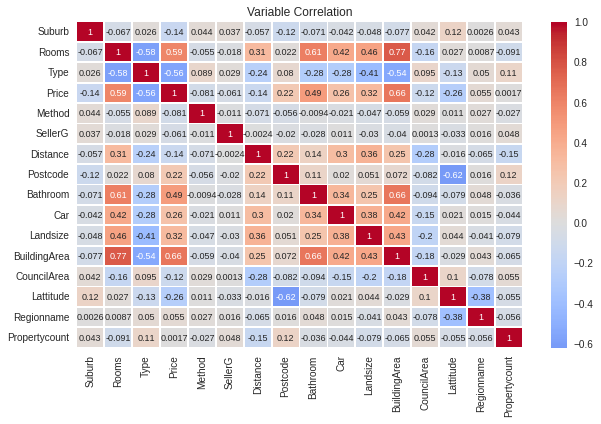

In [26]:
#Representing Matrix as a plot
from IPython.core.pylabtools import figsize
f,ax=plt.subplots(figsize=(10,6))

sns.heatmap(dfpd1.corr(),center=0, linewidths=0.8,cmap='coolwarm',annot=True, annot_kws={"size": 9})
plt.title('Variable Correlation')

Plotting all variables against other variables to see if relation exists between them. Basically it tells the same thing as correlation matrix but in a graphical way.

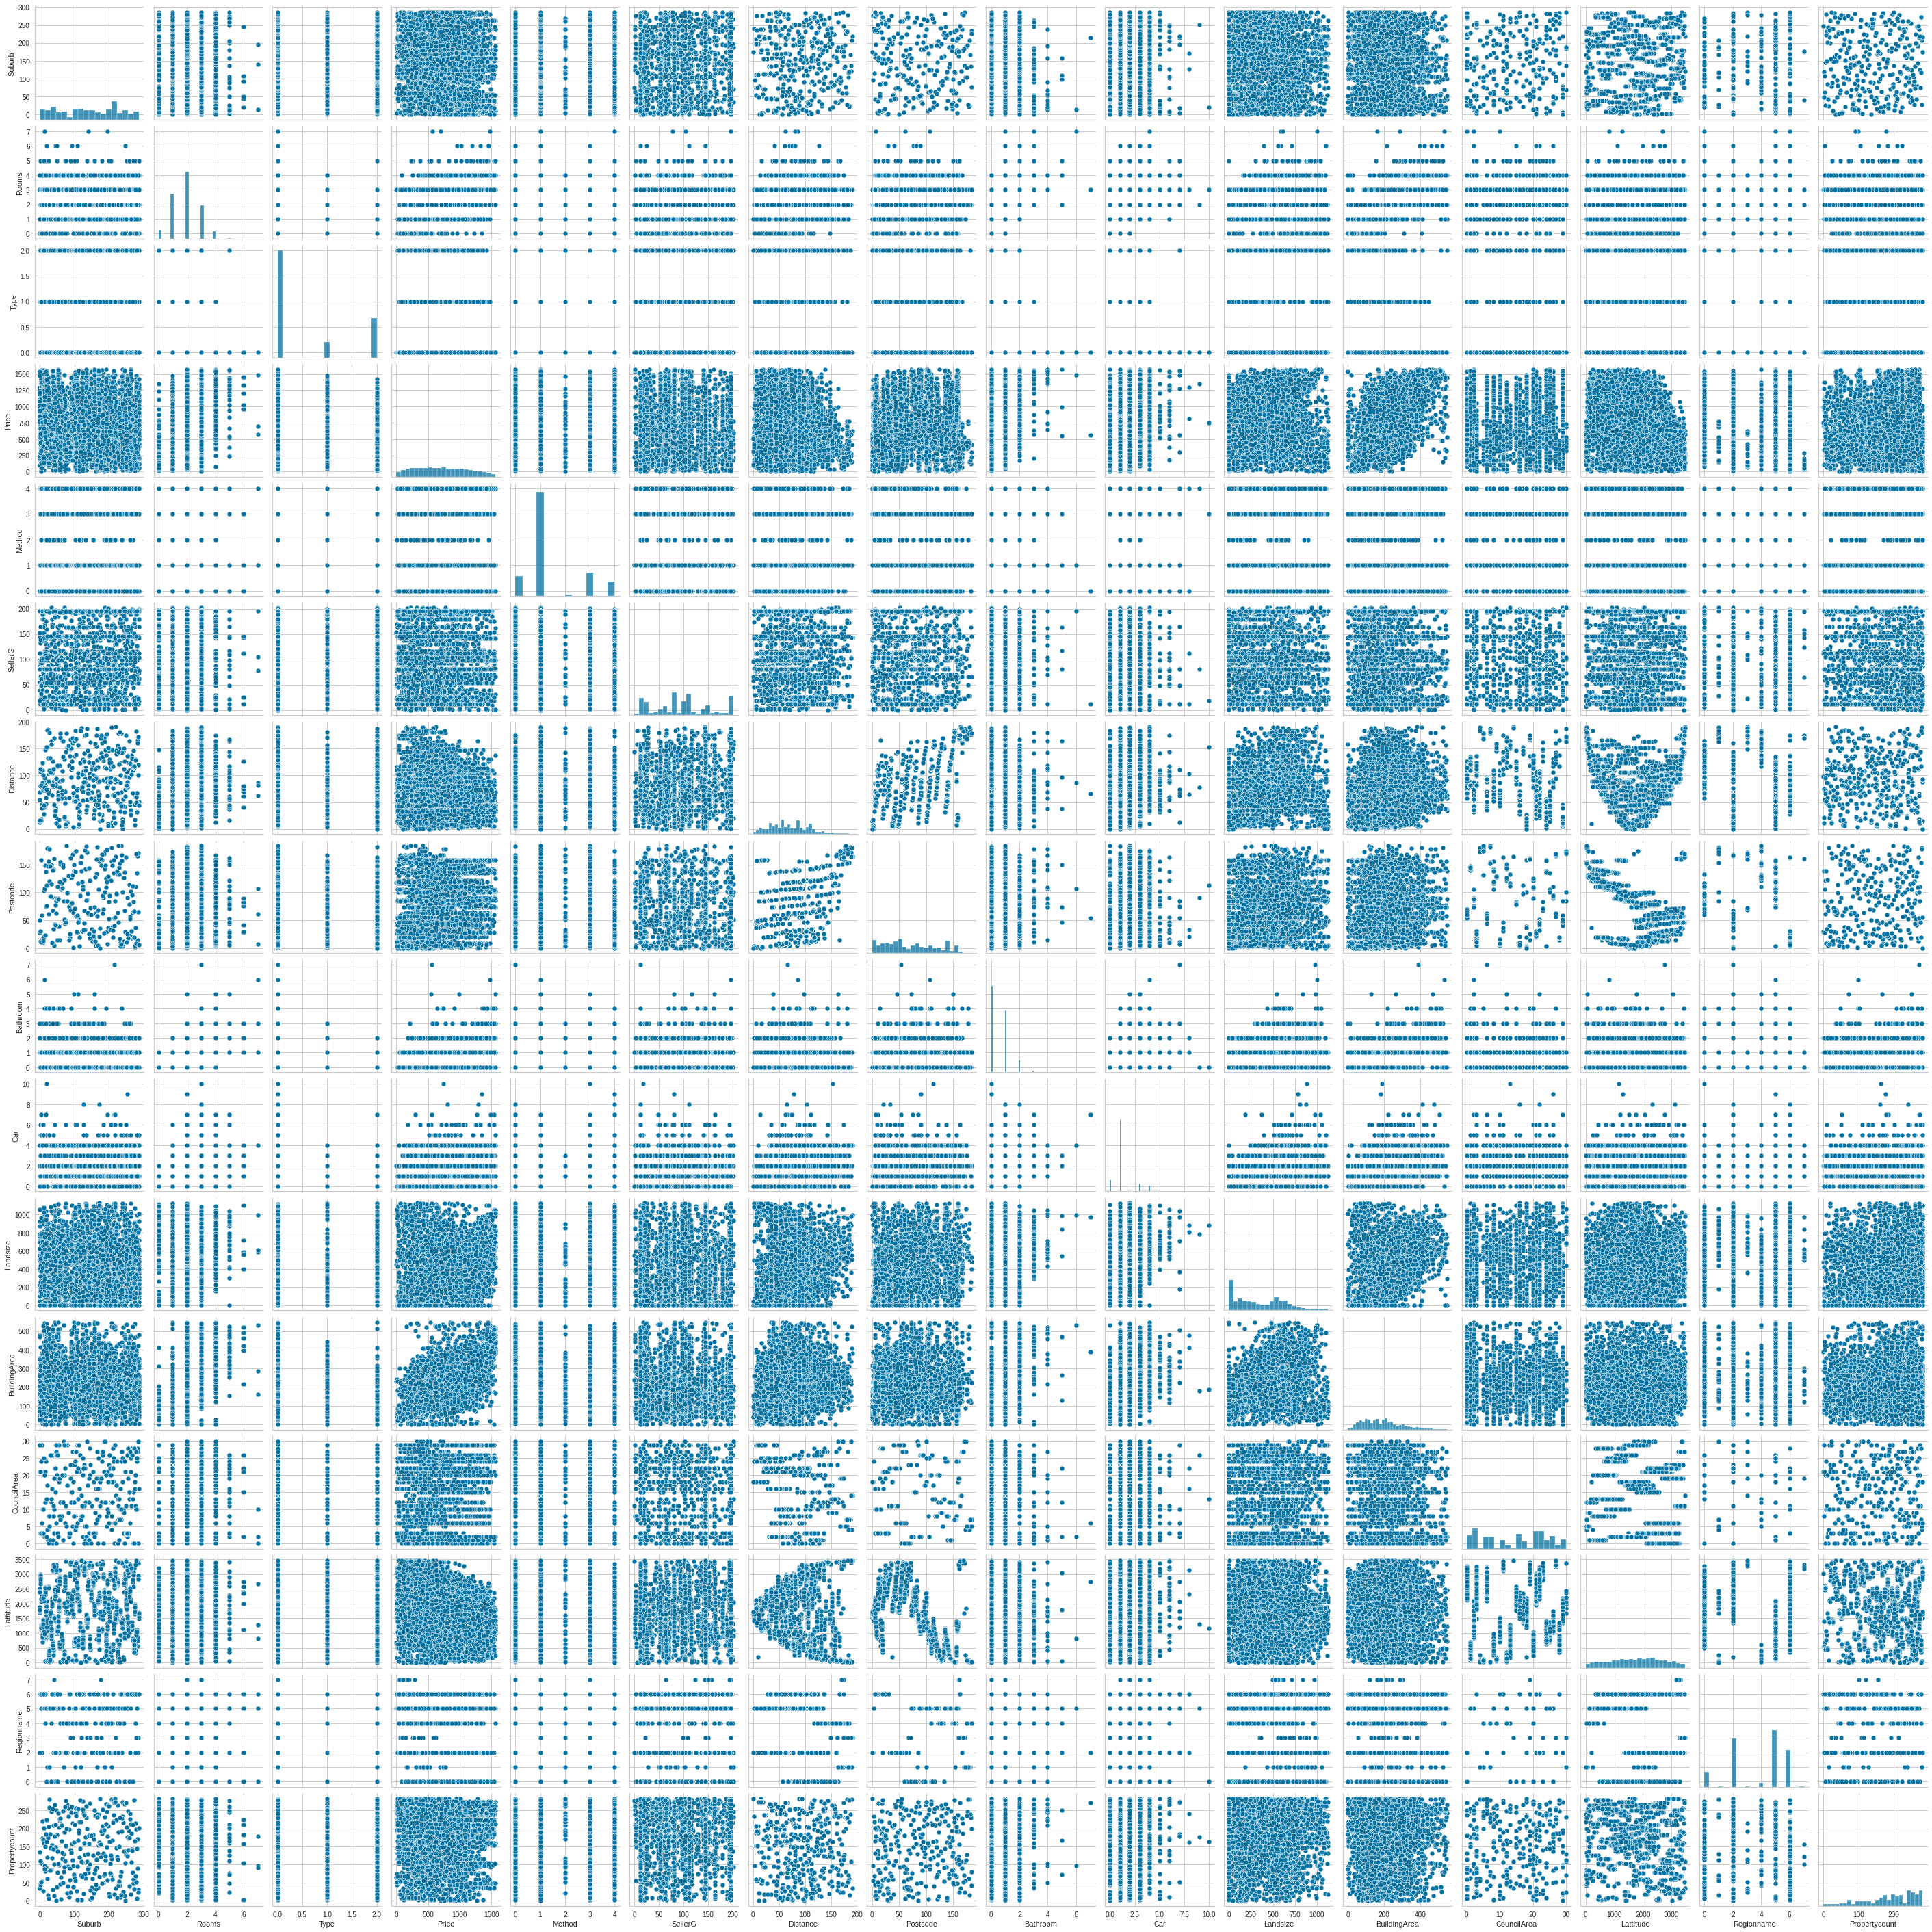

In [27]:
sns.pairplot(dfpd1)


When all independent variables were plotted against 'price' variable it is observed that for'Landsize' and 'BuildingArea' roughly a linear line is obtained. So it can be concluded from this plot that variables Landsize and BuildingArea have linear relation with Price

##**H20 AutoML Rexecution on new model**

Dropping the variables that are not significant for determining Price. Passing this new model again through H20AutoML.

In [28]:
df1=df.drop(['Date','Address','Bedroom2','Longtitude','YearBuilt'], axis=1)

In [29]:
df1_train, df1_test = df1.split_frame([pct_rows])

In [30]:
X1=df1.columns
print(X1)

['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'CouncilArea', 'Lattitude', 'Regionname', 'Propertycount']


In [31]:
#Seperate Dependent variable from Independent variable
y1_numeric ='Price'
X1.remove(y1_numeric) 
print(X1)

['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'CouncilArea', 'Lattitude', 'Regionname', 'Propertycount']


In [32]:
aml1 = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [33]:
aml1.train(x=X1,y=y1_numeric,training_frame=df1_train) 

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_3_AutoML_2_20220214_25418

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 4909.402762074242
RMSE: 70.06713039702883
MAE: 51.802788925878424
RMSLE: NaN
R^2: 0.9696750639493535
Mean Residual Deviance: 4909.402762074242
Null degrees of freedom: 4996
Residual degrees of freedom: 4983
Null deviance: 808980621.1334802
Residual deviance: 24532285.602084987
AIC: 56679.91285980894

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 16539.177502568633
RMSE: 128.6047335931638
MAE: 94.53753918712617
RMSLE: NaN
R^2: 0.8978389990794365
Mean Residual Deviance: 16539.177502568633
Null degrees of freedom: 4996
Residual degrees of freedom: 4981
Null deviance: 809123996.5627286
Residual deviance: 82646269.98033

In [34]:
print(aml1.leaderboard)

model_id mean_residual_deviance rmse mse mae rmsle 
 
 
 StackedEnsemble_AllModels_3_AutoML_2_20220214_25418 16539.2 128.605 16539.2 94.5375 nan 
 StackedEnsemble_AllModels_2_AutoML_2_20220214_25418 16786.6 129.563 16786.6 95.0588 nan 
 StackedEnsemble_AllModels_1_AutoML_2_20220214_25418 16873 129.896 16873 95.4612 nan 
 StackedEnsemble_BestOfFamily_3_AutoML_2_20220214_25418 17032.3 130.508 17032.3 95.533 nan 
 StackedEnsemble_BestOfFamily_2_AutoML_2_20220214_25418 17107.4 130.795 17107.4 96.1904 nan 
 GBM_4_AutoML_2_20220214_25418 17413.8 131.961 17413.8 97.2456 nan 
 GBM_3_AutoML_2_20220214_25418 17648.3 132.847 17648.3 98.4624 nan 
 StackedEnsemble_BestOfFamily_1_AutoML_2_20220214_25418 17803.6 133.43 17803.6 98.9546 nan 
 GBM_grid_1_AutoML_2_20220214_25418_model_4 17842.5 133.576 17842.5 99.8851 nan 
 GBM_2_AutoML_2_20220214_25418 17919.6 133.864 17919.6 99.2208 nan

In [35]:
#assign index values to all the models generated
model_index=0
glm_index=0
glm_model=''
aml1_leaderboard_df1=aml1.leaderboard.as_data_frame()
models_dict={}
for m in aml1_leaderboard_df1['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break 
  model_index=model_index+1  

for m in aml1_leaderboard_df1['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break  
  glm_index=glm_index+1     
models_dict

{'GBM_4_AutoML_2_20220214_25418': 5,
 'GLM_1_AutoML_2_20220214_25418': 40,
 'StackedEnsemble_AllModels_1_AutoML_2_20220214_25418': 2,
 'StackedEnsemble_AllModels_2_AutoML_2_20220214_25418': 1,
 'StackedEnsemble_AllModels_3_AutoML_2_20220214_25418': 0,
 'StackedEnsemble_BestOfFamily_2_AutoML_2_20220214_25418': 4,
 'StackedEnsemble_BestOfFamily_3_AutoML_2_20220214_25418': 3}

In [36]:
#print the index value of best model
print(model_index)
best_model1 = h2o.get_model(aml1.leaderboard[model_index,'model_id'])

5


In [37]:
best_model1.algo

'gbm'

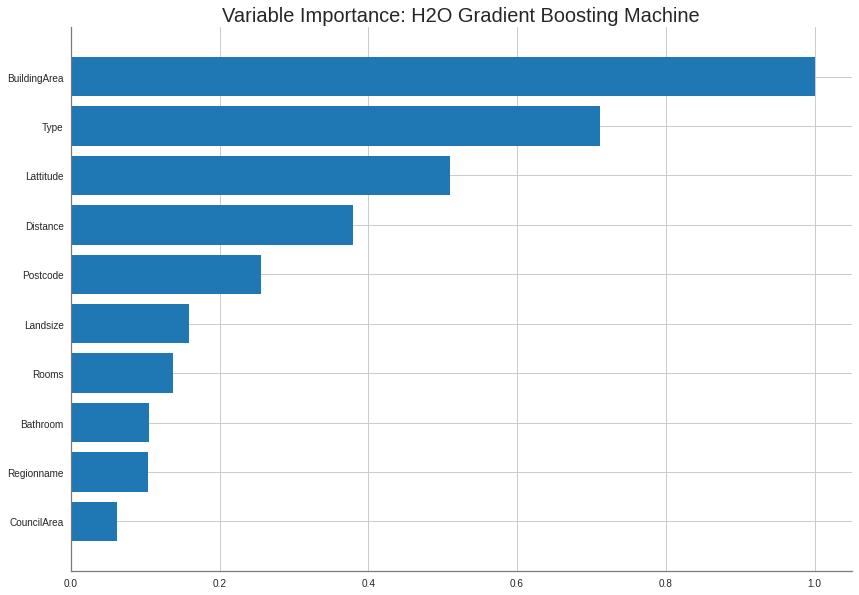

<Figure size 576x396 with 0 Axes>

In [38]:
#plot variables in order of their importance for price prediction
if best_model1.algo in ['gbm','drf','xrt','xgboost']:
    best_model1.varimp_plot()

40
glm


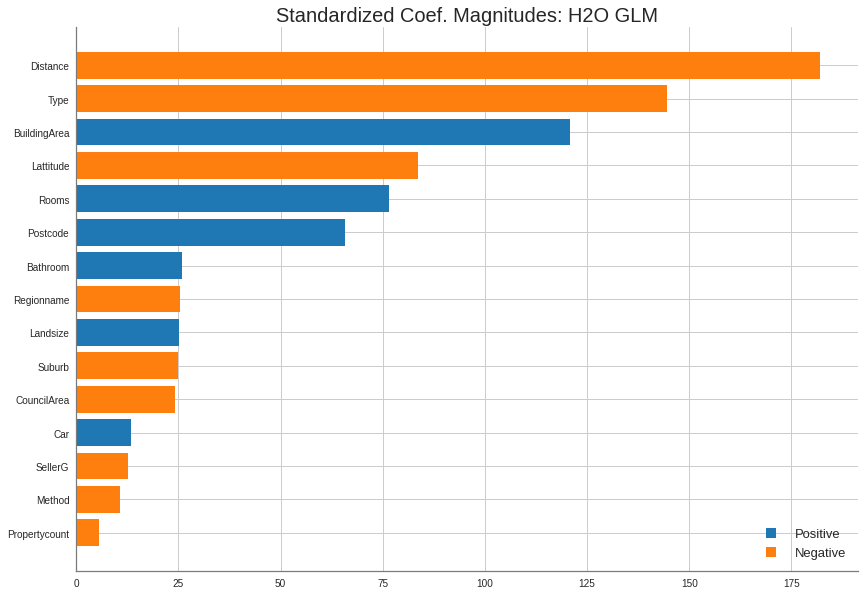

In [39]:
if glm_index is not 0:
  print(glm_index)
  glm_model1=h2o.get_model(aml1.leaderboard[glm_index,'model_id'])
  print(glm_model1.algo) 
  glm_model1.std_coef_plot()

PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%

PartialDependence: Partial Dependence Plot of model GBM_4_AutoML_2_20220214_25418 on column 'BuildingArea'.


buildingarea  mean_response  stddev_response  std_error_mean_response
0       0.000000     673.488121       289.797150                 3.681615
1      28.842105     596.010195       335.566741                 4.263077
2      57.684211     604.119416       321.302109                 4.081858
3      86.526316     640.201180       314.462415                 3.994966
4     115.368421     686.195336       305.405529                 3.879906
5     144.210526     709.840180       304.644971                 3.870244
6     173.052632     740.178048       298.183219                 3.788153
7     201.894737     769.374210       291.897440                 3.708298
8     230.736842     787.879948       305.402330                 3.879865
9     259.578947     828.881686       308.203093                 3.915446
10    288.421053     836.163932       301.879971                 3.835117
11    317.263158     854.946914       305.150159                 3.876662
12    346.105263     877.540355       304.673062                 3.870601
13    374.947368     897.379184       304.183832                 3.864385
14    403.789474     906.677926       307.888451                 3.911449
15    432.631579     911.182108       308.983428                 3.925360
16    461.473684     911.475074       312.195838                 3.966171
17    490.315789     910.840702       314.067197                 3.989945
18    519.157895     888.296511       311.584451                 3.958404
19    548.000000     858.056470       305.526481                 3.881442


PartialDependence: Partial Dependence Plot of model GBM_4_AutoML_2_20220214_25418 on column 'Regionname'.


regionname  mean_response  stddev_response  std_error_mean_response
0         0.0     718.510046       365.696546                 4.645850
1         1.0     715.252362       368.129816                 4.676762
2         2.0     718.435382       369.615063                 4.695631
3         3.0     718.708316       369.910248                 4.699381
4         4.0     719.597463       371.916657                 4.724871
5         5.0     739.760191       387.173795                 4.918699
6         6.0     680.494547       356.766981                 4.532407
7         7.0     680.494547       356.766981                 4.532407


PartialDependence: Partial Dependence Plot of model GBM_4_AutoML_2_20220214_25418 on column 'Lattitude'.


lattitude  mean_response  stddev_response  std_error_mean_response
0      0.000000     769.147509       362.746405                 4.608371
1    182.210526     780.250472       365.573981                 4.644293
2    364.421053     790.584504       367.651058                 4.670680
3    546.631579     793.439950       366.000657                 4.649713
4    728.842105     792.164301       363.804346                 4.621811
5    911.052632     802.032022       372.853938                 4.736778
6   1093.263158     786.258560       370.915007                 4.712146
7   1275.473684     781.046794       370.101458                 4.701810
8   1457.684211     781.665785       371.503678                 4.719624
9   1639.894737     788.339500       373.873551                 4.749731
10  1822.105263     764.591553       369.374103                 4.692570
11  2004.315789     752.416949       372.969515                 4.738246
12  2186.526316     750.967826       367.795306                 4.672513
13  2368.736842     729.486409       354.072386                 4.498175
14  2550.947368     686.916529       325.655796                 4.137168
15  2733.157895     581.920892       262.273050                 3.331946
16  2915.368421     554.997439       246.332322                 3.129433
17  3097.578947     491.085257       224.401394                 2.850820
18  3279.789474     463.022358       216.820414                 2.754511
19  3462.000000     458.678478       215.190082                 2.733799


PartialDependence: Partial Dependence Plot of model GBM_4_AutoML_2_20220214_25418 on column 'Postcode'.


postcode  mean_response  stddev_response  std_error_mean_response
0     0.000000     620.338956       322.381762                 4.095574
1     9.684211     607.926425       323.430116                 4.108892
2    19.368421     608.856901       320.938646                 4.077240
3    29.052632     696.849552       366.436794                 4.655254
4    38.736842     696.186345       364.288551                 4.627962
5    48.421053     701.649470       359.787949                 4.570786
6    58.105263     716.125714       367.350657                 4.666864
7    67.789474     738.591298       366.524024                 4.656362
8    77.473684     768.703760       361.581142                 4.593567
9    87.157895     775.055610       363.475312                 4.617631
10   96.842105     774.865289       362.036095                 4.599347
11  106.526316     778.726286       362.173648                 4.601094
12  116.210526     775.751601       362.250657                 4.602073
13  125.894737     775.931984       362.664821                 4.607334
14  135.578947     782.040309       360.640854                 4.581622
15  145.263158     786.711586       362.426753                 4.604310
16  154.947368     782.413614       363.808301                 4.621861
17  164.631579     767.109499       349.432907                 4.439235
18  174.315789     767.495084       349.070931                 4.434636
19  184.000000     765.564029       348.109734                 4.422425


PartialDependence: Partial Dependence Plot of model GBM_4_AutoML_2_20220214_25418 on column 'Landsize'.


landsize  mean_response  stddev_response  std_error_mean_response
0      0.000000     628.456866       355.698958                 4.518839
1     59.315789     635.644803       337.434428                 4.286805
2    118.631579     647.860669       336.400468                 4.273669
3    177.947368     677.204164       348.338079                 4.425326
4    237.263158     685.753775       348.297082                 4.424805
5    296.578947     695.084727       355.552890                 4.516984
6    355.894737     716.815517       367.412853                 4.667654
7    415.210526     726.510113       372.554723                 4.732977
8    474.526316     733.601506       373.657415                 4.746985
9    533.842105     745.561141       375.332780                 4.768269
10   593.157895     767.341229       380.607415                 4.835279
11   652.473684     776.770237       381.544038                 4.847178
12   711.789474     796.760894       388.454392                 4.934968
13   771.105263     808.765226       389.324591                 4.946023
14   830.421053     813.454209       392.288121                 4.983672
15   889.736842     811.905935       392.013557                 4.980184
16   949.052632     810.928272       403.741668                 5.129179
17  1008.368421     804.959278       403.808365                 5.130026
18  1067.684211     763.849828       394.824649                 5.015896
19  1127.000000     756.192866       394.541597                 5.012300


PartialDependence: Partial Dependence Plot of model GBM_4_AutoML_2_20220214_25418 on column 'Distance'.


distance  mean_response  stddev_response  std_error_mean_response
0     0.000000     898.525859       361.527611                 4.592887
1    10.052632     879.345931       365.829990                 4.647545
2    20.105263     886.933688       372.334251                 4.730176
3    30.157895     846.437772       378.530391                 4.808892
4    40.210526     817.655252       378.605217                 4.809843
5    50.263158     803.739098       379.600930                 4.822493
6    60.315789     773.517890       376.922169                 4.788461
7    70.368421     722.003913       376.195830                 4.779234
8    80.421053     684.248760       374.631573                 4.759361
9    90.473684     663.831534       362.232165                 4.601838
10  100.526316     638.418060       351.950938                 4.471224
11  110.578947     593.576557       340.005851                 4.319472
12  120.631579     576.869392       325.603597                 4.136504
13  130.684211     567.965002       319.516019                 4.059167
14  140.736842     544.484842       310.847657                 3.949043
15  150.789474     466.406524       274.981351                 3.493394
16  160.842105     431.186076       237.248742                 3.014034
17  170.894737     408.203422       228.031303                 2.896935
18  180.947368     410.992777       229.499780                 2.915591
19  191.000000     405.287867       225.461303                 2.864286


PartialDependence: Partial Dependence Plot of model GBM_4_AutoML_2_20220214_25418 on column 'Rooms'.


rooms  mean_response  stddev_response  std_error_mean_response
0    0.0     645.373136       354.967873                 4.509551
1    1.0     668.642571       335.397461                 4.260927
2    2.0     744.456932       348.984764                 4.433541
3    3.0     781.095101       351.146659                 4.461006
4    4.0     784.935409       349.803998                 4.443949
5    5.0     768.243969       347.006586                 4.408410
6    6.0     768.243969       347.006586                 4.408410
7    7.0     768.243969       347.006586                 4.408410


PartialDependence: Partial Dependence Plot of model GBM_4_AutoML_2_20220214_25418 on column 'Suburb'.


suburb  mean_response  stddev_response  std_error_mean_response
0     0.000000     732.477801       380.153605                 4.829514
1    15.052632     716.593617       382.759208                 4.862616
2    30.105263     715.145213       381.898386                 4.851680
3    45.157895     709.682575       380.660388                 4.835952
4    60.210526     710.597395       381.631496                 4.848289
5    75.263158     710.970918       382.215276                 4.855705
6    90.315789     715.479237       382.044128                 4.853531
7   105.368421     717.787899       381.256338                 4.843523
8   120.421053     715.306031       384.753089                 4.887946
9   135.473684     714.458580       384.999626                 4.891078
10  150.526316     714.113210       385.247040                 4.894221
11  165.578947     714.708314       385.993426                 4.903704
12  180.631579     717.052497       385.213645                 4.893797
13  195.684211     719.632304       385.233657                 4.894051
14  210.736842     718.239266       382.110492                 4.854374
15  225.789474     718.217478       381.268300                 4.843675
16  240.842105     718.376568       382.452016                 4.858713
17  255.894737     716.417808       381.574629                 4.847567
18  270.947368     717.751346       381.543600                 4.847172
19  286.000000     718.452415       383.473525                 4.871690

[, , , , , , , ]

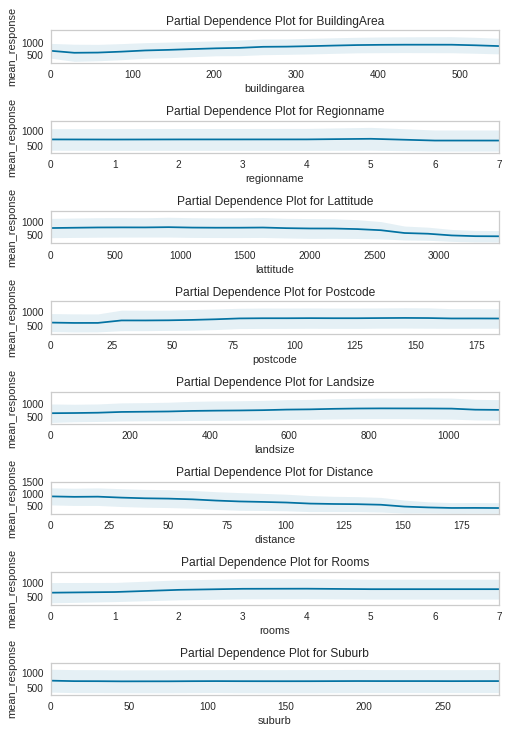

In [40]:
best_model1.partial_plot(df1, cols=['BuildingArea','Regionname', 'Lattitude', 'Postcode', 'Landsize', 'Distance','Rooms','Suburb'])

##**Checking if assumptions violated**

Checking if the model has violated any assumptions. For linear regression some of the assumptions are: (1)There needs to be linear relation between the independent and dependent variable. (2)Homoscedasticity which means normality of the error distribution.The plot for residuals against target variable should be normally distributed. (3)Thirdly, linear regression assumes that there is little or no multicollinearity in the data. Multicollinearity occurs when the independent variables are too highly correlated with each other. (4)There should be no or little auto correlation. One way to test this is by Durbin-Watson test. The values should be brtween 1.5-2.5 for no autocorrelation.

In [41]:
A=dfpd1.drop(['Price'],axis=1)
B=dfpd1['Price']

In [42]:
A_train,A_test,b_train,b_test=tts(A,B,test_size=0.2,random_state=42)

In [43]:
cols1 = ['Suburb','Rooms','Type','Method','SellerG','Distance','Postcode','Bathroom','Car','Landsize','BuildingArea','CouncilArea','Lattitude','Regionname','Propertycount']
model1 = sm.OLS(b_train,sm.add_constant(A_train[cols1])).fit()

In [44]:
b_pred = model1.predict(sm.add_constant(A_train[cols1]))

In [45]:
residuals = b_train-b_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -4.017806623676563e-13


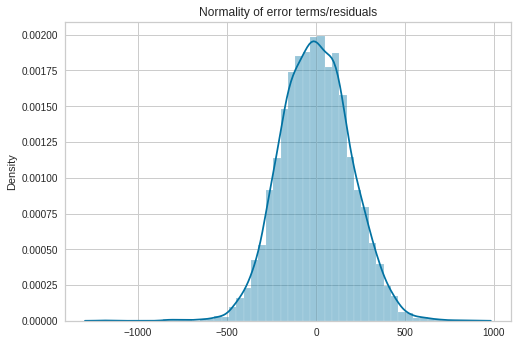

In [46]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

Ideally for the scatterplot the result should be scattered and it should not have any particular pattern.When the same is plotted as distplot it should follow a bell curve pattern.Both the plots give the expected result so even this assumptions is satisfied.



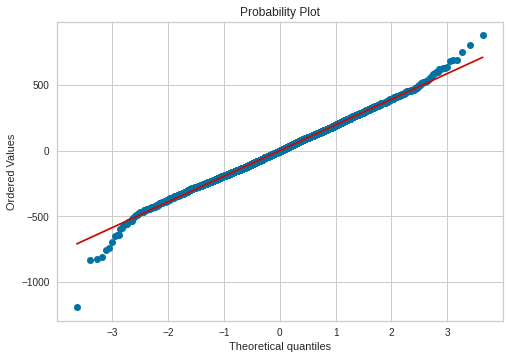

In [59]:
import pylab 
import scipy.stats as stats   
stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

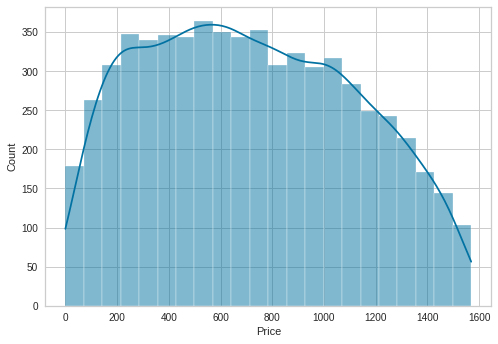

In [47]:
sns.histplot(dfpd.Price, kde = True)

##**Ridge Regularization in H20**


The main purpose of regression is to find patterns in this underlying dataset and generalize it to predict the corresponding target value for some new values of independent values. But sometimes target dataset is inflicted with some random noise. Although there may not be error for training set it will give huge errors in predicting the correct target values for test dataset.To avoid this condition regularization is used. Regularization is a technique used for tuning the random noise function by adding an additional term to noise function. This additional term controls the excessively fluctuating function such that the coefficients don’t take extreme values and the prediction of target value for test data is not highly affected.
For this model, Ridge Regularization is used.

In [48]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
house_glm = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = 0, compute_p_values = True)
house_glm_regularization = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = .001, alpha = 0)

In [49]:
house_glm_regularization.train(x = X1, y = y1_numeric, training_frame = df1_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1644806778250_1


GLM Model: summary


family  ... number_of_iterations training_frame
0    gaussian  ...                    1  py_9_sid_b19e

[1 rows x 8 columns]



ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 38425.4115479314
RMSE: 196.0240075805293
MAE: 156.22393644677888
RMSLE: NaN
R^2: 0.762649714357828
Mean Residual Deviance: 38425.4115479314
Null degrees of freedom: 4996
Residual degrees of freedom: 4981
Null deviance: 808980621.1334802
Residual deviance: 192011781.5050132
AIC: 66965.57367186397

Scoring History: 


timestamp    duration  ...  training_deviance training_mae training_r2
0    2022-02-14 02:58:54   0.000 sec  ...                                            
1    2022-02-14 02:58:54   0.026 sec  ...       38425.411548   156.223936     0.76265

[2 rows x 10 columns]


Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0        Distance           194.611069           1.000000    0.221590
1            Type           151.489090           0.778420    0.172490
2    BuildingArea           126.713684           0.651112    0.144280
3       Lattitude            87.114342           0.447633    0.099191
4           Rooms            76.897827           0.395136    0.087558
5        Postcode            69.670792           0.358000    0.079329
6      Regionname            28.619904           0.147062    0.032587
7     CouncilArea            26.709476           0.137245    0.030412
8          Suburb            25.036135           0.128647    0.028507
9        Landsize            25.002453           0.128474    0.028469
10       Bathroom            21.315725           0.109530    0.024271
11            Car            14.106611           0.072486    0.016062
12        SellerG            12.860895           0.066085    0.014644
13         Method            10.760534           0.055293    0.012252
14  Propertycount             7.339814           0.037715    0.008357

In [50]:
#Model details without regularization
house_glm.train(x = X1, y = y1_numeric, training_frame = df1_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1644806778250_2


GLM Model: summary


family  ... number_of_iterations training_frame
0    gaussian  ...                    1  py_9_sid_b19e

[1 rows x 8 columns]



ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 38425.28358860149
RMSE: 196.0236811933739
MAE: 156.21392932034612
RMSLE: NaN
R^2: 0.7626505047510153
Mean Residual Deviance: 38425.28358860149
Null degrees of freedom: 4996
Residual degrees of freedom: 4981
Null deviance: 808980621.1334802
Residual deviance: 192011142.09224164
AIC: 66965.55703147392

Scoring History: 


timestamp    duration  ...  training_deviance training_mae training_r2
0    2022-02-14 02:58:55   0.000 sec  ...                                            
1    2022-02-14 02:58:55   0.055 sec  ...       38425.283589   156.213929    0.762651

[2 rows x 10 columns]


Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0        Distance           194.935379           1.000000    0.221718
1            Type           151.664841           0.778026    0.172502
2    BuildingArea           126.876434           0.650864    0.144308
3       Lattitude            87.201843           0.447337    0.099183
4           Rooms            76.904938           0.394515    0.087471
5        Postcode            69.775002           0.357939    0.079361
6      Regionname            28.704350           0.147251    0.032648
7     CouncilArea            26.774492           0.137351    0.030453
8          Suburb            25.040817           0.128457    0.028481
9        Landsize            24.997845           0.128237    0.028432
10       Bathroom            21.190773           0.108707    0.024102
11            Car            14.128011           0.072475    0.016069
12        SellerG            12.862890           0.065985    0.014630
13         Method            10.761061           0.055203    0.012240
14  Propertycount             7.386796           0.037894    0.008402

The accuracy and other related variables were same for both the cases:
When dataset was regularized and when dataset was not regularized. This tells that for this specific model regularization does not help.

Calculating p-value and Z-value after regularization

In [51]:
coeff_table = house_glm._model_json['output']['coefficients_table']


In [52]:
coeff_table.as_data_frame()

names  coefficients  ...        p_value  standardized_coefficients
0       Intercept    991.529653  ...   0.000000e+00                 716.238343
1          Suburb     -0.299110  ...   8.969542e-19                 -25.040817
2           Rooms     78.681763  ...   7.865543e-54                  76.904934
3            Type   -177.260671  ...   0.000000e+00                -151.664840
4          Method     -9.472294  ...   1.256632e-04                 -10.761061
5         SellerG     -0.224111  ...   4.281294e-06                 -12.862890
6        Distance     -5.040270  ...   0.000000e+00                -194.935380
7        Postcode      1.475773  ...   2.762559e-68                  69.775000
8        Bathroom     29.626202  ...   8.627924e-08                  21.190772
9             Car     15.197145  ...   1.416078e-05                  14.128011
10       Landsize      0.087033  ...   1.618898e-13                  24.997845
11   BuildingArea      1.171255  ...  2.319164e-136                 126.876433
12    CouncilArea     -2.908221  ...   2.092464e-19                 -26.774492
13      Lattitude     -0.097075  ...   1.139786e-95                 -87.201847
14     Regionname    -14.432537  ...   2.407063e-19                 -28.704350
15  Propertycount     -0.103151  ...   1.006342e-02                  -7.386797

[16 rows x 6 columns]

##**Data Report**

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id mean_residual_deviance rmse mse mae rmsle training_time_ms predict_time_per_row_ms algo 
 
 
 StackedEnsemble_AllModels_3_AutoML_2_20220214_25418 16539.2 128.605 16539.2 94.5375 nan 1119 0.195373 StackedEnsemble 
 StackedEnsemble_AllModels_2_AutoML_2_20220214_25418 16786.6 129.563 16786.6 95.0588 nan 738 0.139842 StackedEnsemble 
 StackedEnsemble_AllModels_1_AutoML_2_20220214_25418 16873 129.896 16873 95.4612 nan 658 0.122252 StackedEnsemble 
 StackedEnsemble_BestOfFamily_3_AutoML_2_20220214_25418 17032.3 130.508 17032.3 95.533 nan 508 0.087615 StackedEnsemble 
 StackedEnsemble_BestOfFamily_2_AutoML_2_20220214_25418 17107.4 130.795 17107.4 96.1904 nan 528 0.037003 StackedEnsemble 
 GBM_4_AutoML_2_20220214_25418 17413.8 131.961 17413.8 97.2456 nan 1266 0.029689 GBM 
 GBM_3_AutoML_2_20220214_25418 17648.3 132.847 17648.3 98.4624 nan 934 0.026353 GBM 
 StackedEnsemble_BestOfFamily_1_AutoML_2_20220214_25418 17803.6 133.43 17803.6 98.9546 nan 487 0.030298 StackedEnsemble 
 GBM_grid_1_AutoML_2_20220214_25418_model_4 17842.5 133.576 17842.5 99.8851 nan 1371 0.023573 GBM 
 GBM_2_AutoML_2_20220214_25418 17919.6 133.864 17919.6 99.2208 nan 929 0.016755 GBM 
 GBM_5_AutoML_2_20220214_25418 17925.9 133.888 17925.9 98.9628 nan 953 0.017273 GBM 
 GBM_grid_1_AutoML_2_20220214_25418_model_5 18293.5 135.254 18293.5 99.9845 nan 1834 0.019708 GBM 
 GBM_grid_1_AutoML_2_20220214_25418_model_3 18468.7 135.9 18468.7 101.341 nan 657 0.017213 GBM 
 GBM_grid_1_AutoML_2_20220214_25418_model_1 18610.1 136.419 18610.1 101.736 nan 1186 0.021004 GBM 
 GBM_1_AutoML_2_20220214_25418 18643.7 136.542 18643.7 101.927 nan 1691 0.023664 GBM 
 GBM_grid_1_AutoML_2_20220214_25418_model_2 19137.6 138.339 19137.6 103.059 nan 840 0.017878 GBM 
 XGBoost_3_AutoML_2_20220214_25418 19181.1 138.496 19181.1 103.088 nan 444 0.002679 XGBoost 
 DRF_1_AutoML_2_20220214_25418 19277.5 138.844 19277.5 104.76 0.361882 2584 0.016152 DRF 
 XGBoost_grid_1_AutoML_2_20220214_25418_model_4 19281.8 138.859 19281.8 103.204 nan 558 0.003512 XGBoost 
 XGBoost_grid_1_AutoML_2_20220214_25418_model_9 19356.7 139.128 19356.7 103.903 nan 705 0.005138 XGBoost

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

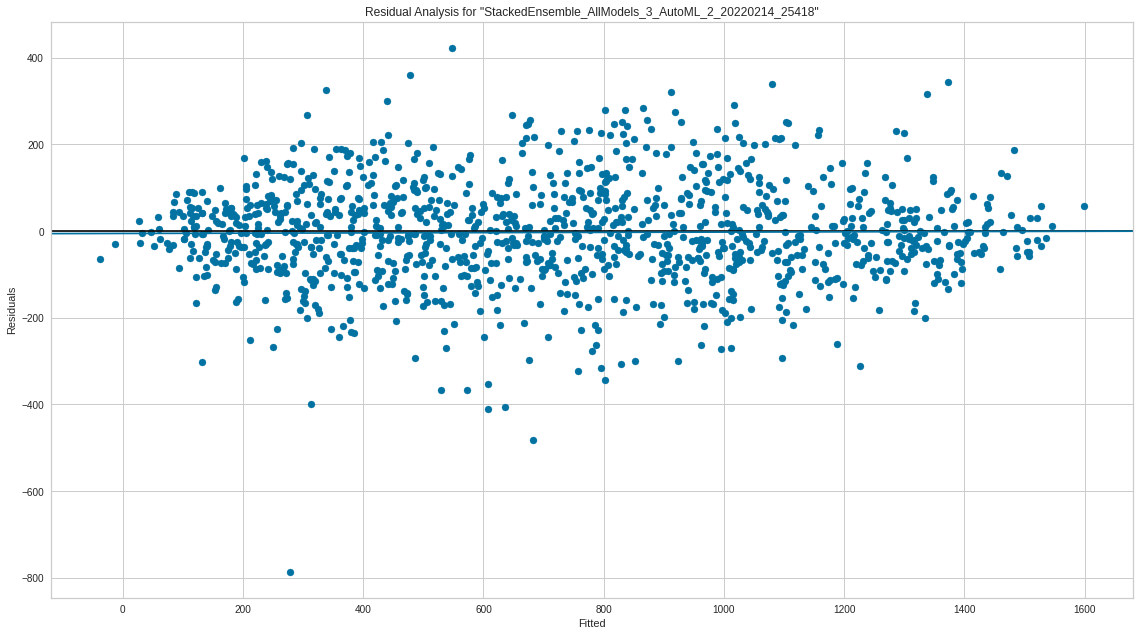

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

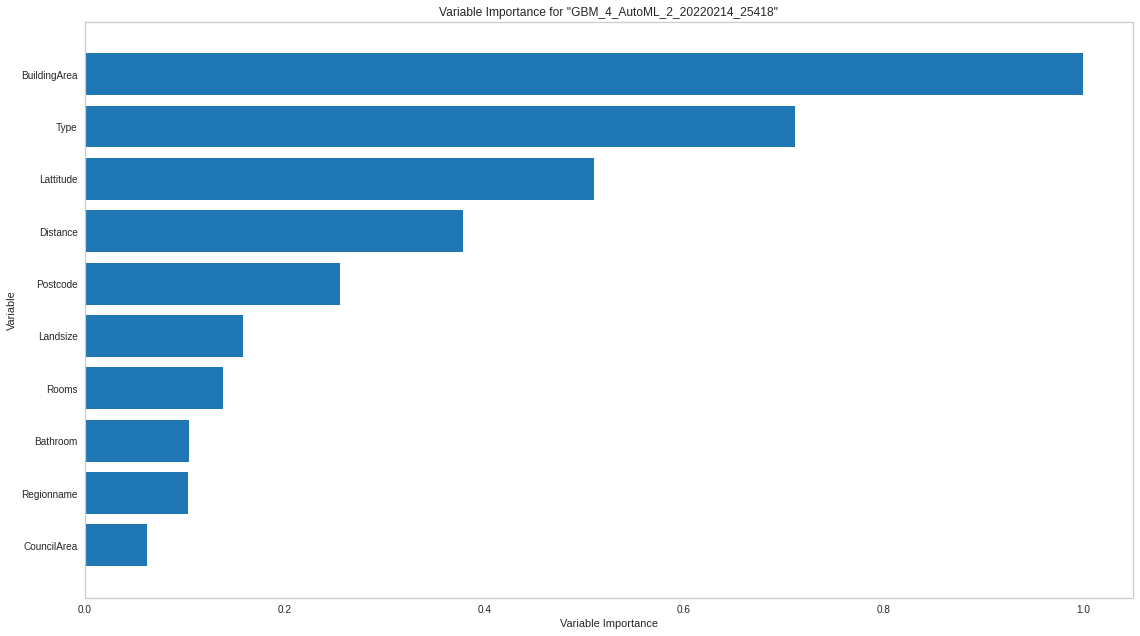

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

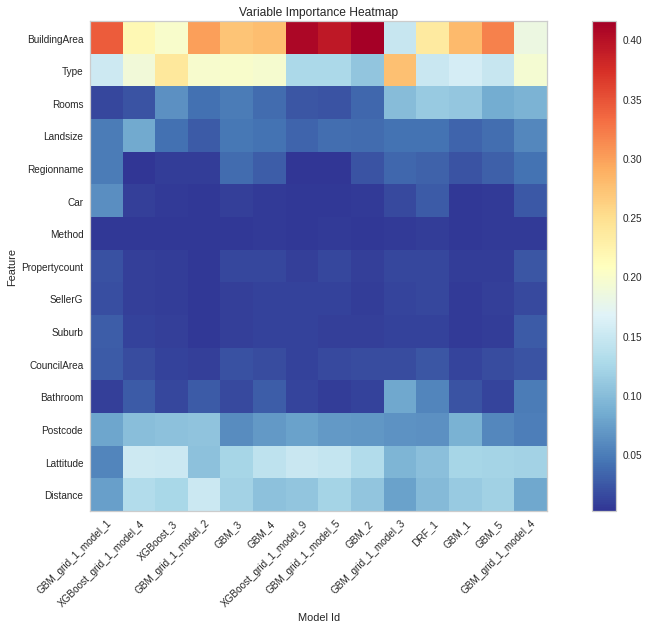

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

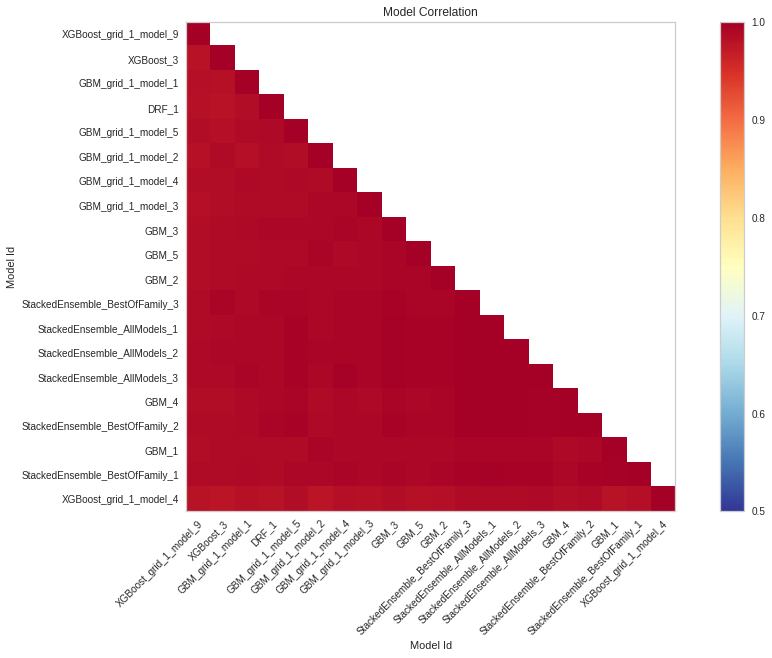

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

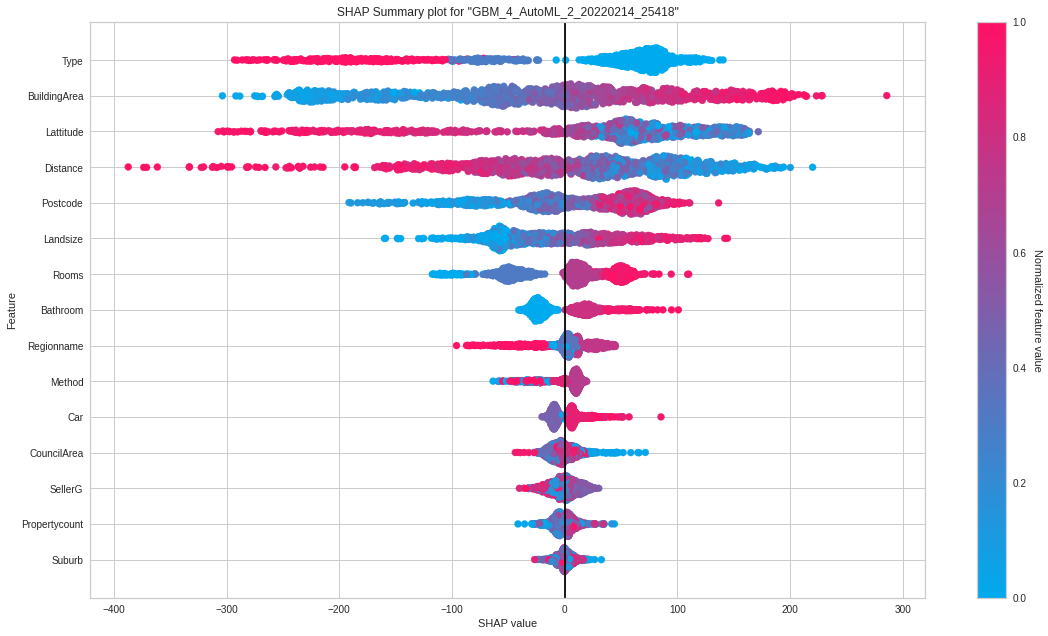

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

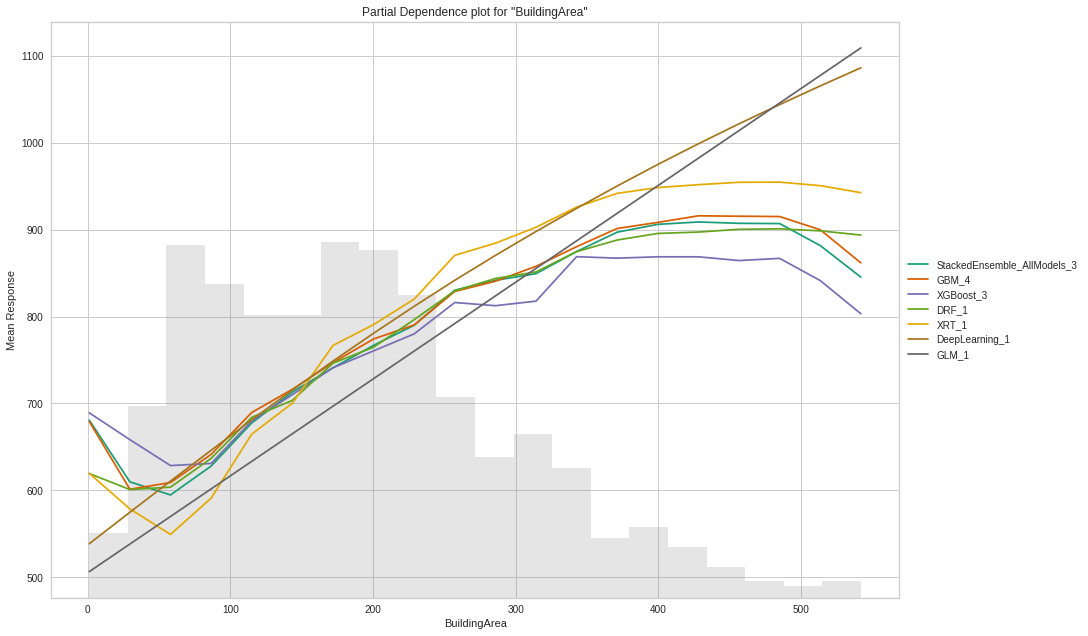

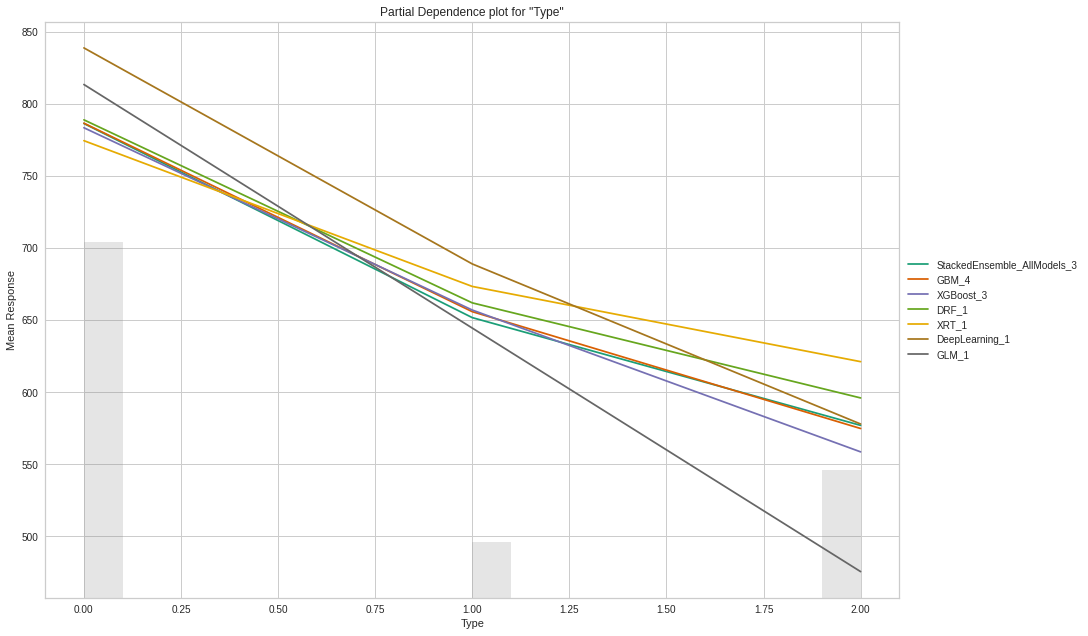

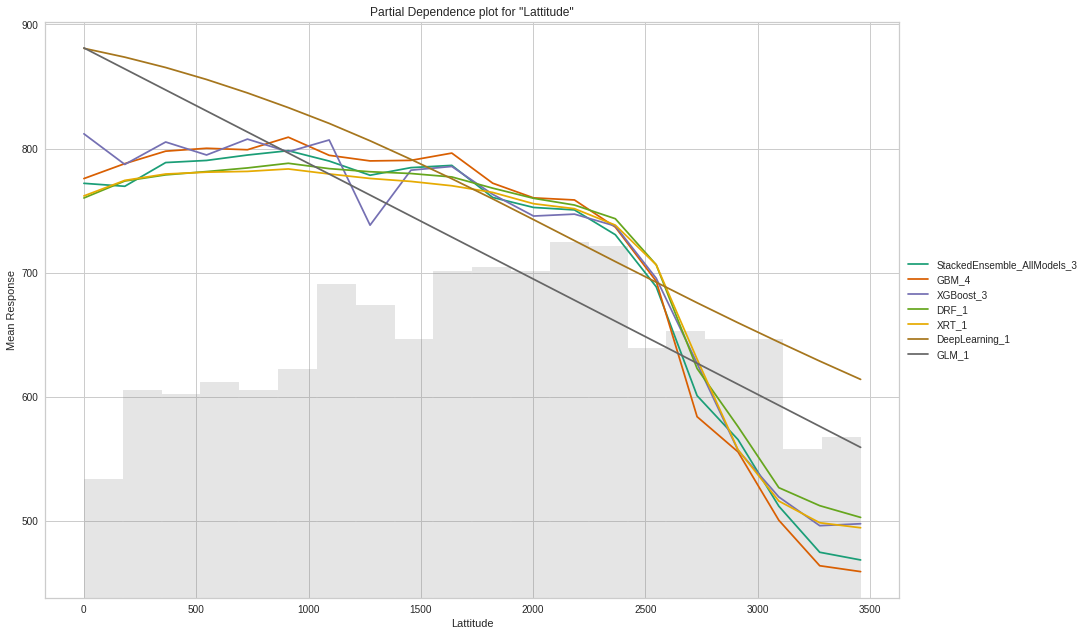

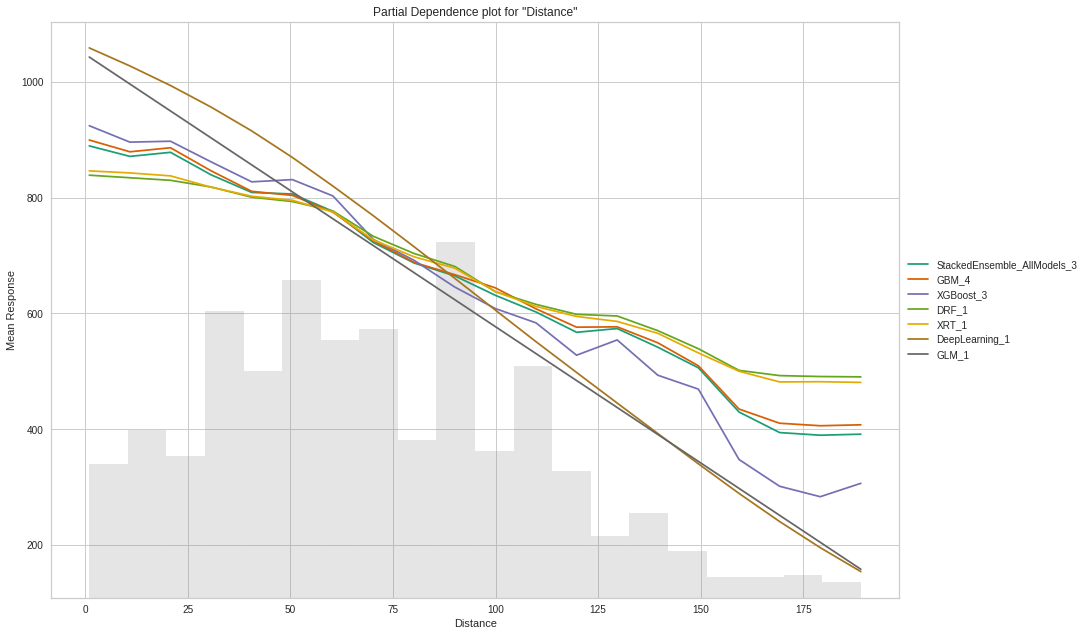

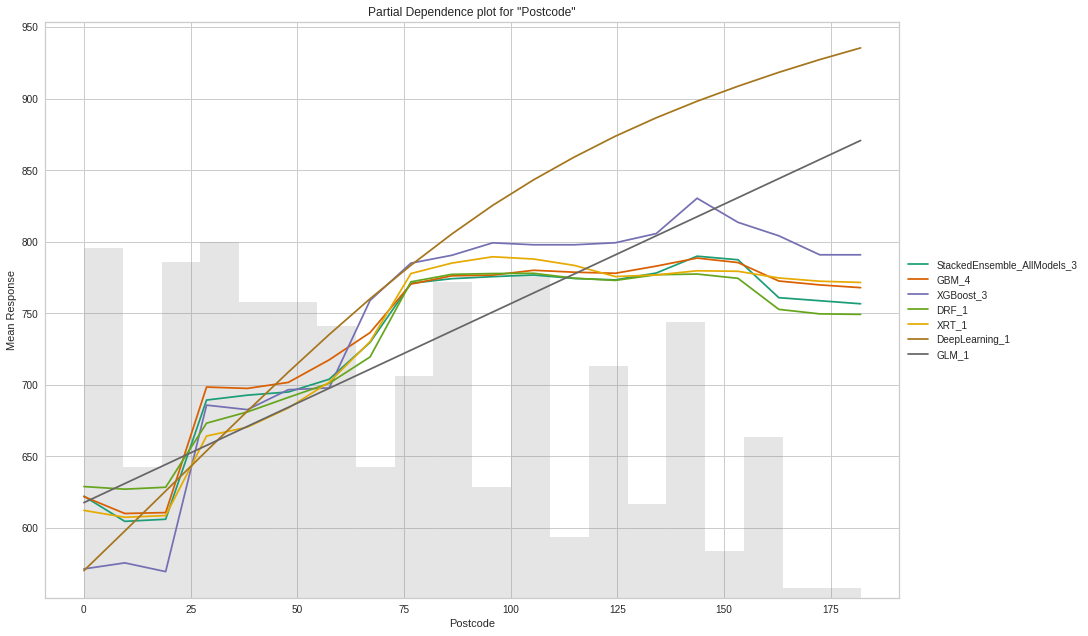

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

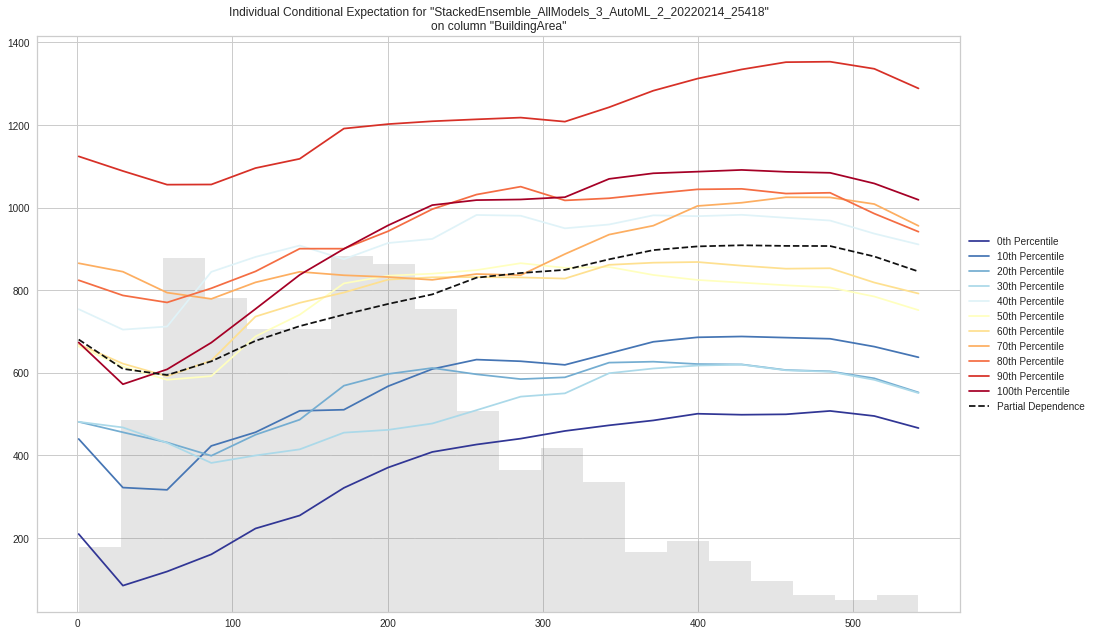

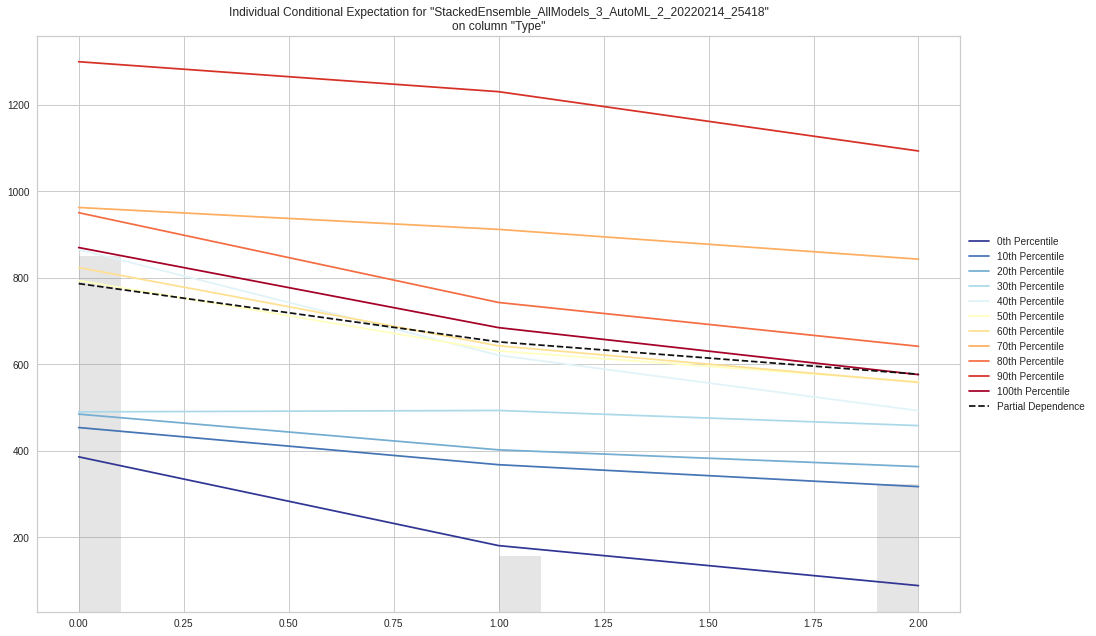

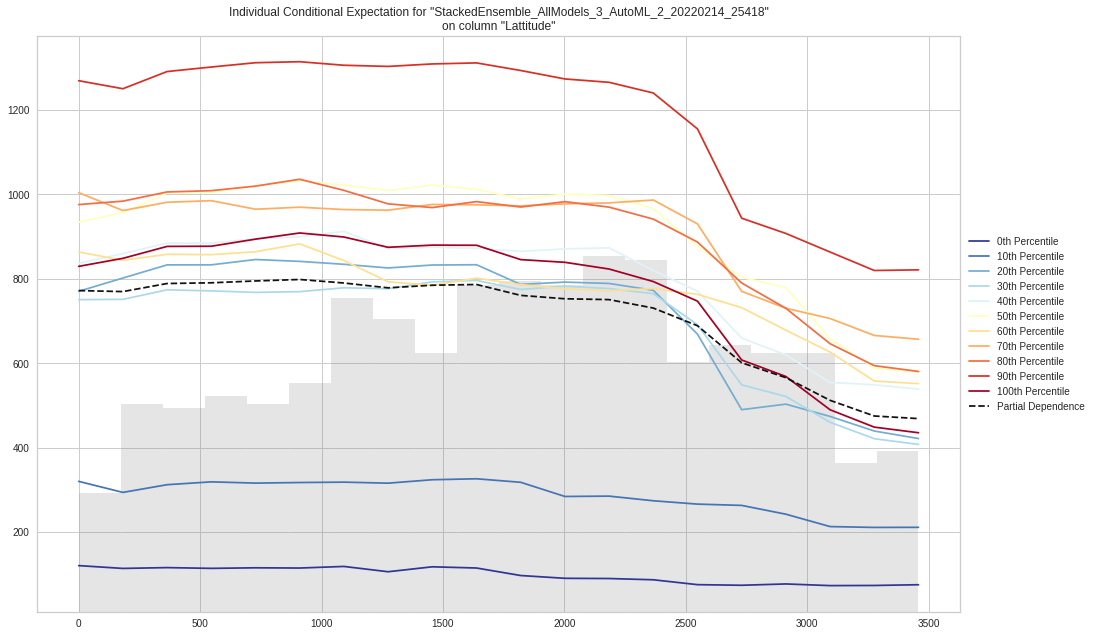

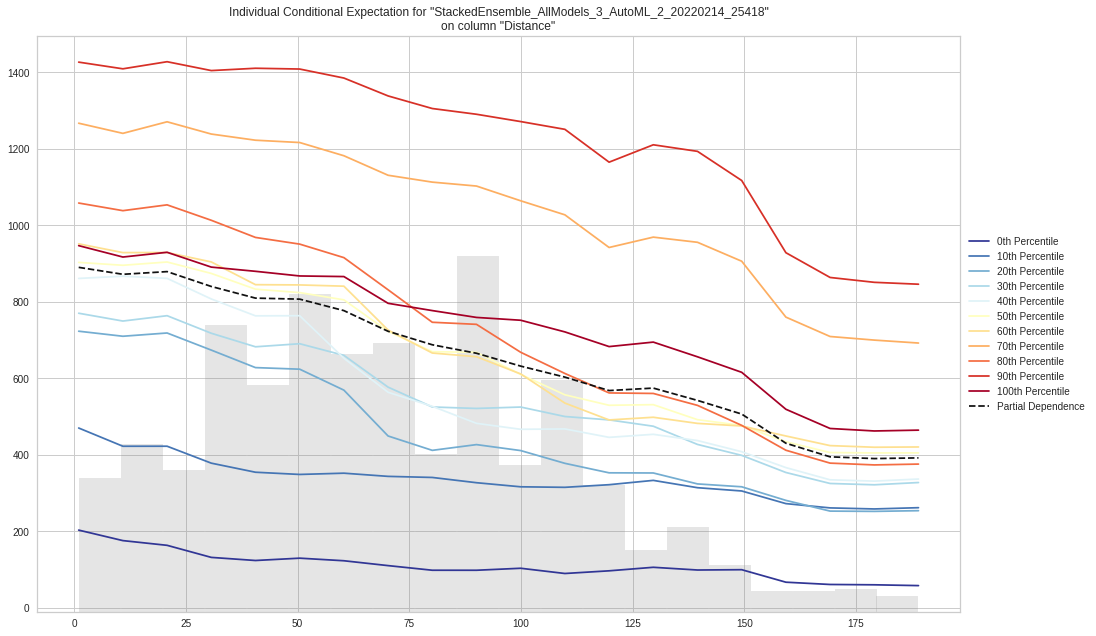

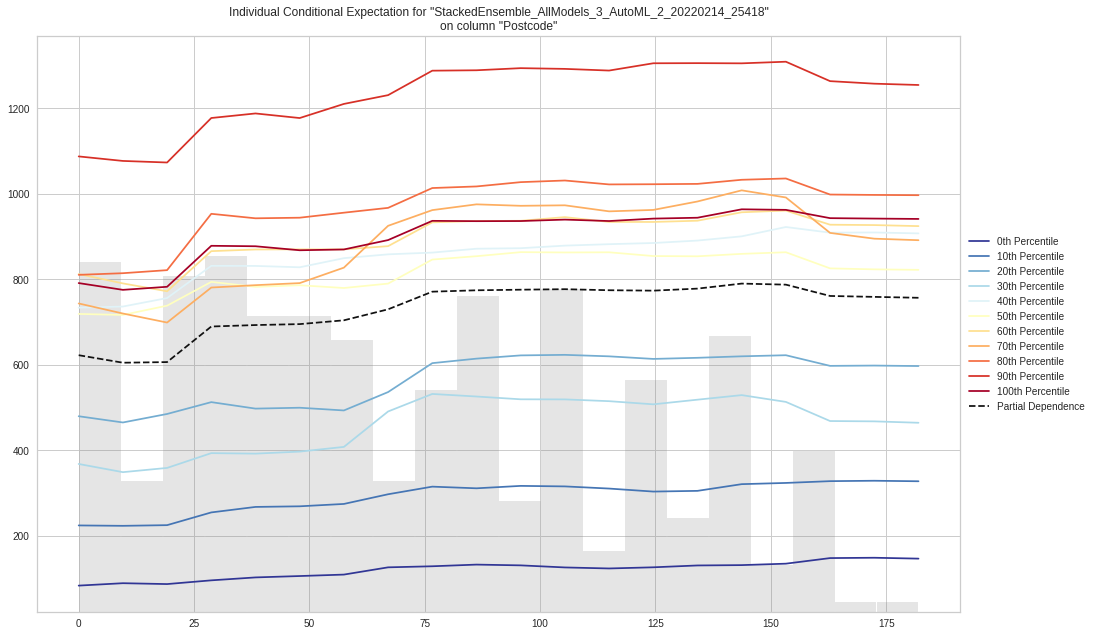

In [53]:
exa = aml1.explain(df1_test)

##**Hyperparameter Tuning** <br>


To find best set a hyperparameter and combinations of interacting hyperparameters for a given dataset hyperparameters tuning is used. It objectively searches different values for model hyperparameters and chooses a subset that results in a model that achieves the best performance on a given dataset.

In [54]:
s = dfpd1['Price']

t = dfpd1.drop(['Price'], axis = 1)

In [55]:
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV

In [56]:
t_train, t_test, s_train, s_test = train_test_split (t, s, random_state = 101, test_size = 0.2)

In [57]:
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestRegressor

mode = RandomForestRegressor()

param_vals = {'max_depth': [200, 500, 800, 1100], 'n_estimators': [100,200, 300, 400], 'min_samples_split' : [2,3,5]

}

random_rf = RandomizedSearchCV(estimator=mode, param_distributions=param_vals,

n_iter=10, scoring='accuracy', cv=5,

refit=True, n_jobs=-1)

#Training and prediction



random_rf.fit(t_train, s_train)

preds = random_rf.best_estimator_.predict(t_test)


In [58]:
random_rf.best_params_

{'max_depth': 500, 'min_samples_split': 2, 'n_estimators': 400}

##**Conclusion**

A fundamental algorithm based on the linear regression method to predict housing prices was constructed. VIF, p-values and other tests were considered to ignore some of the independent variables.  H20.ai framework was used to train and test the variables of the dataset of Melbourne Housing price. This gave the best model as ‘gbm’ and accuracy for test data was 89.9%.  From the results shown it can be concluded that the proposed linear regression model can effectively analyze and predict the housing price to some extent. Admittedly, the prediction accuracy is still limited at specific points, and the model still needs to be improved in further research. In further research into the corresponding models, different techniques like removing outliers and using ensemble or booster can help achieve better prediction.

##**Assignment Question/Answers**



Q1) Is the relationship significant?
A relationship is said to be statistically significant when the p value for the variables is less than 0.05.P value is probability of obtaining a result at least as extreme as the current one, assuming null hypothesis is true. A small p value depicts that there is very little similarity between the two groups and hence null hypothesis can be ignored.
P-value was calculated by two ways for this model. From the OLS method it was observed that values for ‘Address’ and ‘Date’ were greater than 0.05. So, it can be concluded that other that p-value for all the variables of dataset is less than 0.05. 
Hence for the chosen dataset it can be concluded that the relationship is significant.



Q2) Are any model assumptions violated?
Assumptions for linear regression are:
1)	Linear relationship- The graph for dependent and independent variable needs to be linear by keeping other variables constant. When target variable is plotted against all other independent variables, linear relation is observed for few of them. Hence this assumption is not violated.
2)	Homoscedasticity which means normality of the error distribution - The plot for residuals should be normally distributed i.e., it should form a bell-curve shape. For this model the same is achieved.
3)	No or little multicollinearity-This can be determined by correlation matrix. For this model some of the assumptions are violated. Multicollinearity exists between variables Rooms and BuildingArea. 
4)	No autocorrelation can be determined with Durbin-Watson test. Values between 1.5 to 2.5 signifies no autocorrelation. For this model the value is 1.6, therefore this assumption is not violated.




Q3) Is there any multicollinearity in the model?
When one independent variable is related to another independent variable that is its highly correlated then multicollinearity exists in the model. It’s an issue as it undermines the statistical significance of an independent variable.
Multicollinearity can be determined by computing correlation matrix or calculating VIF value of all variables.
In correlation matrix a coefficient closer to +1 or -1 tells us that those two variables are highly correlated. For VIF values a value above 10 tells us that multicollinearity exists.
In this model some variables had VIF value greater than 10 and p value was greater than 0.05. By dropping those columns and rechecking the values expected output was achieved. Currently high correlation exists between Rooms and BuildingArea 



Q4) In the multivariate models are predictor variables independent of all the other predictor variables?
Variables are said to be independent when there is no relation between them. To check this relation, correlation matrix can be used, or it can be observed from graphs too whether there is any pattern followed or not.
When correlation matrix is computed for the model, it can be observed that Rooms and BuildingArea are correlated to each other. Other than those other predictors are independent from each other.



Q5)In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.
From the variable importance plot, the most to least important variables are displayed.
For my model BuildingArea, Type, Latitude and Rooms are top 4 most important variables to determine Price. VIF and p-values for Address, Date, Bedroom2, YearBuilt and Longtitude was high than the ideal values. So those variables were excluded from the model.



Q6) Does the model make sense?
For a model to make sense it should follow all the assumptions and have p value, VIF between their respective ranges. RMSE should be as low as possible considering the minimum and maximum values of the target variable. Other than that, R2 too is 0.76 which is considered good in terms of accuracy. So overall the model makes sense.
To increase the accuracy, some additional variables can be dropped depending on their importance. Furthermore, outliers can be removed or boosting, or ensemble model can be used.



Q7)Does regularization help?
Regularization is a technique used for tuning the random noise function by adding an additional term to noise function. This additional term controls the excessively fluctuating function such that the coefficients don’t take extreme values and the prediction of target value for test data is not highly affected. The main use of Regularization is to minimize the validation loss and try to improve the accuracy of the model.
For this model Ridge Regularization was used on training data. It was observed that Root Mean Square Error (RMSE) and R2 was calculated twice, once when regularization was not applied and once when regularization was applied. The values were same in both the cases. Hence it can be concluded that for this model regularization does not help.



Q8) Which independent variables are significant?
 Variables are significant when p-value is less than 0.05. For this model except for ‘Date’,’YearBuilt’ and ‘Address’ all other variables have p-value less than 0.05. So, it can be said that all variables are significant.



Q9) Which hyperparameters are important?
To find best set a hyperparameter and combinations of interacting hyperparameters for a given dataset hyperparameters tuning is used. It objectively searches different values for model hyperparameters and chooses a subset that results in a model that achieves the best performance on a given dataset.
For this model tuning is performed using RandomForestRegressor. The best hyperparameters for this model are:-
'max_depth': 500, 'min_samples_split': 2 and 'n_estimators': 100

##**LICENSE**

MIT License

Copyright (c) 2022 Sanika Patne

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

##**REFERENCES**

H20.ai- https://docs.h2o.ai/ <br>
OLS Model- http://net-informations.com/ds/mla/ols.html<br>
Linear Regression- https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/ <br>
Linear Regression Assumptions- https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-linear-regression/ <br>
Kaggle Notebook- https://www.kaggle.com/stephaniestallworth/melbourne-housing-market-eda-and-regression <br>
Dataset- https://www.kaggle.com/dansbecker/melbourne-housing-snapshot <br>
Professor's AutoML Notebook- https://github.com/nikbearbrown/AI_Research_Group/tree/main/Kaggle_Datasets/AutoML